<a href="https://colab.research.google.com/github/samia-75-shahid/second-test/blob/main/Weed_Crop_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Step 2: Set dataset paths
train_path = '/content/drive/MyDrive/WeedCrop.v1i.yolov5pytorch/train'
test_path = '/content/drive/MyDrive/WeedCrop.v1i.yolov5pytorch/test'

In [ ]:
# Step 3: Load training and testing images
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2469 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [ ]:
# Step 4: Class names
class_names = list(train_gen.class_indices.keys())
print("Classes:", class_names)

Classes: ['images', 'labels']


In [ ]:
# Step 5: Load pre-trained model and add custom layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 6: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 7: Train the model
model.fit(train_gen, validation_data=test_gen, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.9195 - loss: 0.1660 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 8.7842e-04
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 5.7956e-04
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 1.0000 - loss: 7.2157e-04 - val_accuracy: 1.0000 - val_loss: 4.0950e-04
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 1.0000 - loss: 5.2842e-04 - val_accuracy: 1.0000 - val_loss: 3.0255e-04


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


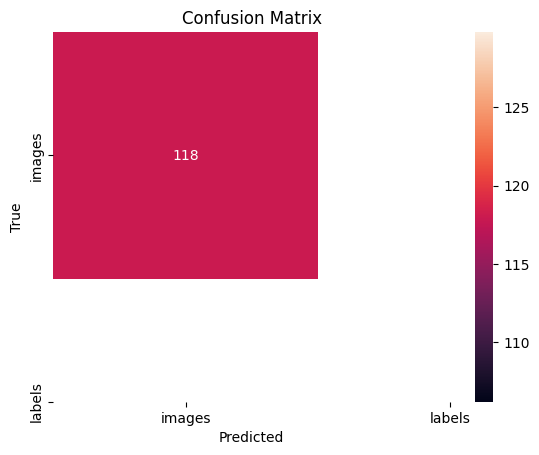

In [ ]:
# Step 8: Show confusion matrix
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Step 9: Predict on a single image
img_path = '/content/drive/MyDrive/WeedCrop.v1i.yolov5pytorch/test/images/32520_jpg.rf.81a97847f9f7ae7d06fa4e52e5d8f305.jpg'

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (224, 224))
img_array = np.expand_dims(img_resized / 255.0, axis=0)

result = model.predict(img_array)
predicted_class = class_names[np.argmax(result)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


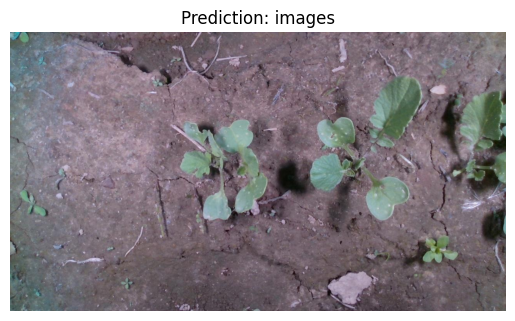

In [ ]:
# Step 10: Show the image with prediction
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()